# project bonhomie ${t\bar{t}H}$ and ${t\bar{t}b\bar{b}}$ classification BDT

In [1]:
import graphviz
from matplotlib import gridspec
import matplotlib.pylab as plt
from matplotlib.ticker import NullFormatter, NullLocator, MultipleLocator
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
from scipy import stats
import seaborn as sns
sns.set_palette('husl')
sns.set(style = 'ticks')
import sklearn.datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import sklearn.tree
import sqlite3
import warnings
warnings.filterwarnings("ignore")

# read

In [2]:
df = pd.read_csv("ttHbb_data.csv")
df.head()

,TTHReco_best_Higgsleptop_dR,TTHReco_withH_best_Higgsttbar_dR,TTHReco_best_TTHReco,Aplanarity_jets,TTHReco_best_Higgs_mass,dRbb_MaxPt_Sort4,Mbb_MindR_Sort4,H1_all,dEtajj_MaxdEta,LHD_Discriminant,TTHReco_best_b1Higgsbhadtop_dR,TTHReco_best_Higgsbleptop_mass,dRbb_avg_Sort4,nHiggsbb30_Sort4,dRlepbb_MindR_Sort4,Mjj_MindR,HT_jets,TTHReco_best_bbHiggs_dR,classification
0,-1.000000,-1.000000,-1.000000,0.010764,-1.000,1.873108,29691.271,0.801864,1.611009,-1.000000,-1.000000,-1.00,1.596763,2,1.926379,29691.271,200475.97,-1.000000,1
1,3.033175,2.914220,0.000834,0.027035,156656.200,1.190597,57697.246,0.525295,1.440214,0.429600,0.664401,360101.97,2.093996,2,2.911004,57697.246,520111.80,1.190597,1
2,3.362126,2.896700,0.115693,0.065426,162454.690,2.151490,41279.270,0.707541,0.484865,0.398901,2.522366,226994.64,1.869288,0,1.299827,30980.066,417521.62,3.028662,1
3,-1.000000,-1.000000,-1.000000,0.048023,-1.000,0.880868,73485.016,0.487572,1.895097,-1.000000,-1.000000,-1.00,2.143145,3,2.155922,73485.016,275745.00,-1.000000,1
4,2.637625,2.656071,0.469479,0.289182,58203.133,1.388736,59727.780,0.162432,2.234762,0.599817,2.199806,129147.22,1.998076,3,1.264251,62289.004,562667.20,1.378433,1


In [3]:
features = list(df.columns[:-1])
print(features)
X = df[features]
y = df["classification"]

['TTHReco_best_Higgsleptop_dR', 'TTHReco_withH_best_Higgsttbar_dR', 'TTHReco_best_TTHReco', 'Aplanarity_jets', 'TTHReco_best_Higgs_mass', 'dRbb_MaxPt_Sort4', 'Mbb_MindR_Sort4', 'H1_all', 'dEtajj_MaxdEta', 'LHD_Discriminant', 'TTHReco_best_b1Higgsbhadtop_dR', 'TTHReco_best_Higgsbleptop_mass', 'dRbb_avg_Sort4', 'nHiggsbb30_Sort4', 'dRlepbb_MindR_Sort4', 'Mjj_MindR', 'HT_jets', 'TTHReco_best_bbHiggs_dR']


In [4]:
classifier = sklearn.tree.DecisionTreeClassifier(
    min_samples_split = 20,
    random_state      = 99,
    max_depth         = 5
)
classifier.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

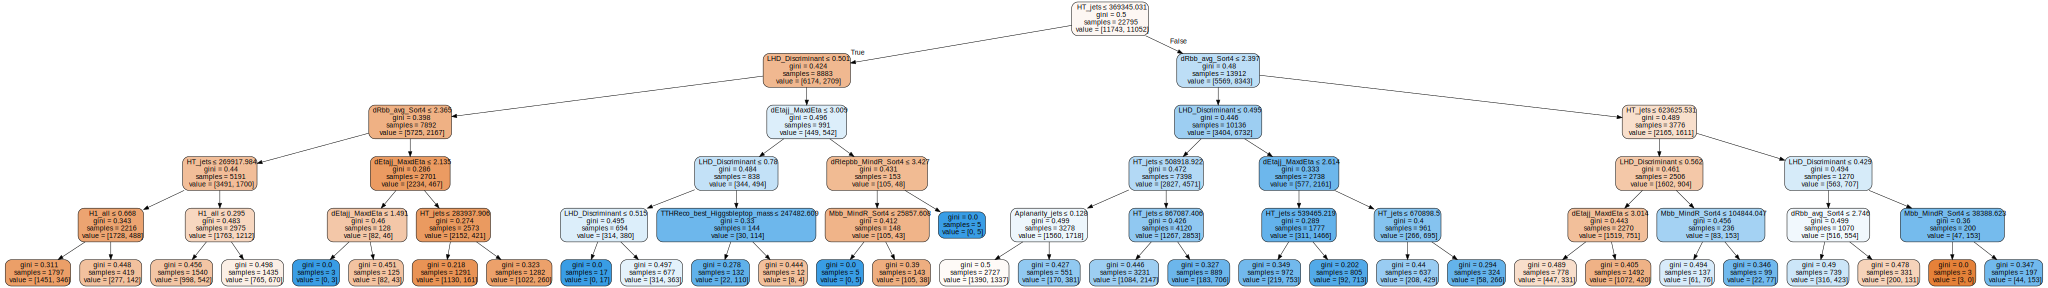

In [5]:
graph = graphviz.Source(
    sklearn.tree.export_graphviz(
        classifier,
        out_file           = None,
        feature_names      = list(df[features].columns.values),
        filled             = True,
        rounded            = True,
        special_characters = True
    )
)
graph

# accuracy

In [6]:
y_predictions = classifier.predict(X)
y_predictions
sklearn.metrics.accuracy_score(y, y_predictions)

0.683351612195657

# feature importances

In [7]:
_df = pd.DataFrame()
_df["variable"]   = X.columns.values
_df["importance"] = classifier.feature_importances_
_df.index         = _df["variable"].values
del _df["variable"]
_df = _df.sort_values(by = "importance", ascending = False)
_df

,importance
HT_jets,0.580307
dRbb_avg_Sort4,0.190065
LHD_Discriminant,0.154543
dEtajj_MaxdEta,0.030467
Aplanarity_jets,0.017219
H1_all,0.015864
Mbb_MindR_Sort4,0.006724
TTHReco_best_Higgsbleptop_mass,0.002552
dRlepbb_MindR_Sort4,0.002259
Mjj_MindR,0.000000


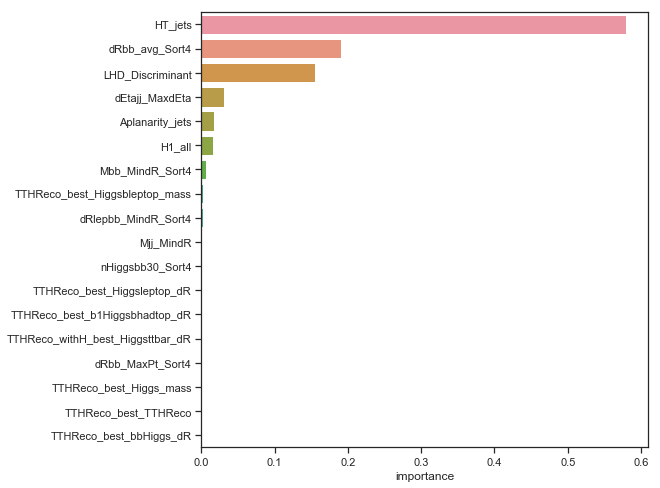

In [8]:
plt.rcParams["figure.figsize"] = [8, 8]
sns.barplot(_df["importance"], _df.index);
plt.xlabel('importance')
plt.show();